# Benchmark Statsmodel vs. Scikit Learn vs. Apex OLS Implementation

Next steps are to abstract OLS functionality to builder class that implements much of the logic that is universally accessible across linear models (ridge, lasso, ols, gls, etc.).

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Apex packages
from apex.ml.linear.models import LinearRegression as LinearRegressionApex

In [2]:
def _make_regression(X):
    b0 = 5
    b1 = 4
    b2 = -8
    b3 = 10
    return b0 + b1 * X[:, 0] + b2 * X[:, 1] + b3 * X[:, 2] + np.random.normal(loc=0, scale=1.0)

np.random.seed(1)
n_features = 3
nobs = 50000
X = np.random.random((nobs, n_features))
y = _make_regression(X).reshape(-1, 1)

# Statsmodels OLS

In [3]:
start_sm = time.time()
model_0 = sm.OLS(exog=X - np.mean(X, axis=0), endog=y).fit()
end_sm = time.time()
sm_runtime = end_sm - start_sm
model_0.params

array([ 4., -8., 10.])

# ScikitLearn OLS

In [4]:
model_1 = LinearRegression(fit_intercept=True)
skl_start = time.time()
model_1.fit(X, y)
skl_end = time.time()
skl_runtime = skl_end - skl_start
model_1.coef_, model_1.intercept_

(array([[ 4., -8., 10.]]), array([3.22490106]))

# Apex OLS

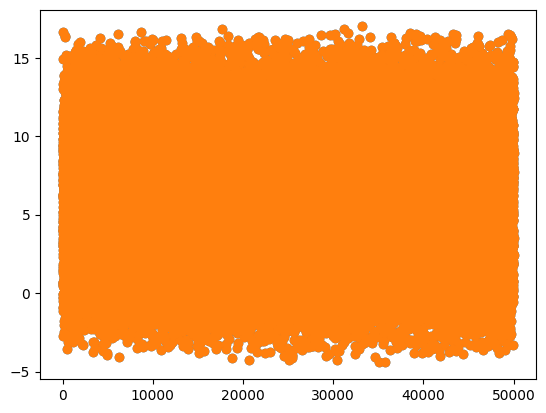

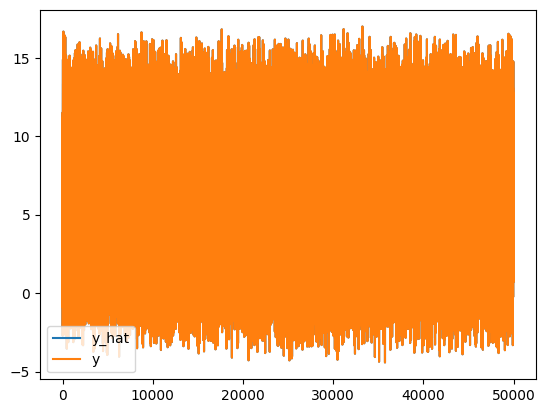

---BETA---
[[ 3.22490106]
 [ 4.        ]
 [-8.        ]
 [10.        ]]
---SE---
[[0.]
 [0.]
 [0.]
 [0.]]
---R^2---
[[1.]]
---T-Stat---
[[ 2.36461146e+16]
 [ 2.67885513e+16]
 [-5.34648661e+16]
 [ 6.69027934e+16]]
---P-Value---
[[0.]
 [0.]
 [0.]
 [0.]]


In [5]:
model_2 = LinearRegressionApex(X=X, y=np.array(y), fit_intercept=True)
apex_start = time.time()
model_2.fit()
apex_end = time.time()
apex_runtime = apex_end - apex_start

# Plot y and y_hat
df = pd.concat([pd.DataFrame(model_2.predict(X=model_2.X)), pd.DataFrame(y)], axis=1)
df.columns = ['y_hat', 'y']
plt.scatter(x=df.index, y=df.iloc[:, 0])
plt.scatter(x=df.index, y=df.iloc[:, 1])
plt.show()
df.plot()
plt.show()

print("---BETA---")
print(model_2.beta) 
print("---SE---")
print(model_2.standard_error.round(3))
print("---R^2---") 
print(model_2.r_squared)
print("---T-Stat---") 
print(model_2.t_stat)
print("---P-Value---") 
print(model_2.p_value)

<Axes: >

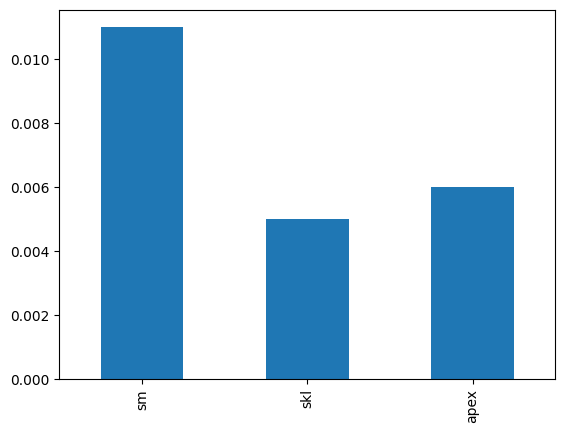

In [6]:
pd.Series([sm_runtime, skl_runtime, apex_runtime], index=['sm', 'skl', 'apex']).plot(kind="bar")

In [7]:
model_2.summary()

,Coefficient,Standard Error,T-Stat,P-value,Other
Intercept,3.2249,0.0,2.364611e+16,0.0,NaN
X1,4.0000,0.0,2.678855e+16,0.0,NaN
X2,-8.0000,0.0,-5.346487e+16,0.0,NaN
X3,10.0000,0.0,6.690279e+16,0.0,NaN
R-squared,NaN,NaN,NaN,NaN,1.0000
MSE,NaN,NaN,NaN,NaN,0.0000
SSD,NaN,NaN,NaN,NaN,753392.7942
SSE,NaN,NaN,NaN,NaN,0.0000


# Sklearn Sample Regression Data

In [8]:
X, y = make_regression(n_samples=1000000, n_features=10, n_informative=5, noise=6, random_state=1)

# Statsmodels OLS

In [9]:
start_sm = time.time()
model_0 = sm.OLS(exog=X - np.mean(X, axis=0), endog=y).fit()
end_sm = time.time()
sm_runtime = end_sm - start_sm
model_0.params

array([-4.19320792e-03, -1.32988960e-03, -1.66540549e-03,  7.08613989e+01,
       -2.18289641e-03,  5.24149097e+01,  4.56340890e+01,  2.43826497e+01,
        8.18117691e+01,  4.69771510e-03])

# ScikitLearn OLS

In [10]:
model_1 = LinearRegression(fit_intercept=True)
skl_start = time.time()
model_1.fit(X, y)
skl_end = time.time()
skl_runtime = skl_end - skl_start
model_1.coef_, model_1.intercept_

(array([-4.19320792e-03, -1.32988960e-03, -1.66540549e-03,  7.08613989e+01,
        -2.18289641e-03,  5.24149097e+01,  4.56340890e+01,  2.43826497e+01,
         8.18117691e+01,  4.69771510e-03]),
 0.0005313520273838718)

# Apex OLS

In [11]:
model_2 = LinearRegressionApex(X=X, y=np.array(y), fit_intercept=True)
apex_start = time.time()
model_2.fit()
apex_end = time.time()
apex_runtime = apex_end - apex_start

print("---BETA---")
print(model_2.beta) 
print("---SE---")
print(model_2.standard_error.round(3))
print("---R^2---") 
print(model_2.r_squared)
print("---T-Stat---") 
print(model_2.t_stat)
print("---P-Value---") 
print(model_2.p_value)

---BETA---
[[ 5.31352027e-04]
 [-4.19320792e-03]
 [-1.32988960e-03]
 [-1.66540549e-03]
 [ 7.08613989e+01]
 [-2.18289641e-03]
 [ 5.24149097e+01]
 [ 4.56340890e+01]
 [ 2.43826497e+01]
 [ 8.18117691e+01]
 [ 4.69771510e-03]]
---SE---
[[0.006]
 [0.006]
 [0.006]
 [0.006]
 [0.006]
 [0.006]
 [0.006]
 [0.006]
 [0.006]
 [0.006]
 [0.006]]
---R^2---
[[0.99790306]]
---T-Stat---
[[ 8.85068848e-02]
 [-6.99294380e-01]
 [-2.21445694e-01]
 [-2.77378898e-01]
 [ 1.17959763e+04]
 [-3.63619694e-01]
 [ 8.73456028e+03]
 [ 7.59092759e+03]
 [ 4.05736256e+03]
 [ 1.36356369e+04]
 [ 7.81676858e-01]]
---P-Value---
[[0.92947383]
 [0.48436824]
 [0.82474546]
 [0.78148924]
 [0.        ]
 [0.71614209]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.43440469]]


<Axes: >

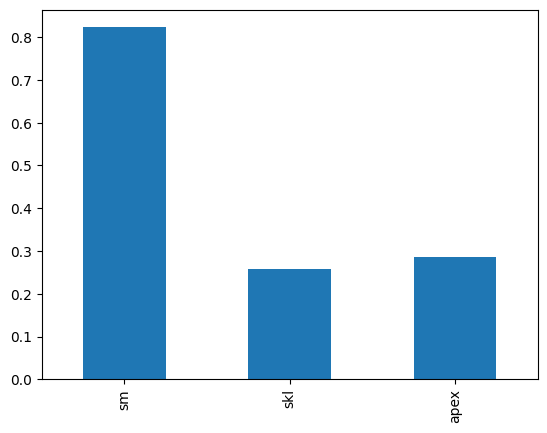

In [12]:
pd.Series([sm_runtime, skl_runtime, apex_runtime], index=['sm', 'skl', 'apex']).plot(kind="bar")